# Importações

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys
import os
import matplotlib.pyplot as plt
#from sklearn.preprocessing import minmax_scale
import matplotlib.dates as mdates
import locale

# Dados Meteo

In [2]:
sys.path.append(os.path.abspath(".."))
from meteorology.data.meteorology_data import GetMeteorologyData
df = GetMeteorologyData()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29973 entries, 0 to 29972
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          29973 non-null  datetime64[ns]
 1   temp              29973 non-null  float64       
 2   feelslike         29973 non-null  float64       
 3   dew               29973 non-null  float64       
 4   humidity          29973 non-null  float64       
 5   precip            28966 non-null  float64       
 6   precipprob        29973 non-null  float64       
 7   preciptype        804 non-null    object        
 8   windgust          2088 non-null   float64       
 9   windspeed         29966 non-null  float64       
 10  winddir           29790 non-null  float64       
 11  sealevelpressure  29973 non-null  float64       
 12  cloudcover        22653 non-null  float64       
 13  visibility        29967 non-null  float64       
 14  conditions        2997

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# Selecionar só as colunas temp e precip e fazer o resample diário com média
df = df[['temp', 'precip']].resample('D').mean()

# contadores corrigidos

In [4]:
df_corrigido_final = pd.read_csv(r"C:\Users\joana\Desktop\Projeto\construcao_modelos\df_corrigido_final.csv")

In [5]:
df_corrigido_final

,detected,direction_2,count_2,direction_3,count_3,direction_4,count_4,direction_5,count_5,direction_6,...,count_32,direction_33,count_33,direction_34,count_34,direction_35,count_35,holiday,weekend,exog
0,2021-08-01,219,327,155,323,138,424,238,341,539,...,500,401,769,354,691,526,1149,0,1,1
1,2021-08-02,144,252,194,381,117,372,249,364,735,...,486,355,590,436,777,523,1163,0,0,0
2,2021-08-03,151,257,187,397,137,411,321,431,732,...,568,441,699,376,724,584,1194,0,0,0
3,2021-08-04,141,266,157,337,158,423,306,404,706,...,563,379,626,430,799,616,1236,0,0,0
4,2021-08-05,159,259,182,333,121,370,257,370,740,...,584,367,602,424,846,636,1245,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2024-02-25,298,583,45,146,113,188,123,339,192,...,239,187,583,273,776,198,548,0,1,1
939,2024-02-26,226,494,290,606,193,316,281,732,357,...,206,155,374,381,1214,221,608,0,0,0
940,2024-02-27,235,539,347,743,240,377,428,1053,433,...,285,344,770,468,1368,271,780,0,0,0
941,2024-02-28,249,573,254,572,261,437,379,972,456,...,317,352,829,460,1399,267,744,0,0,0


# Dados diários com meteo

In [6]:
df_corrigido_final = df_corrigido_final.rename(columns={'detected': 'datetime'})
df_corrigido_final['datetime'] = pd.to_datetime(df_corrigido_final['datetime'])

In [7]:
df = df.reset_index()


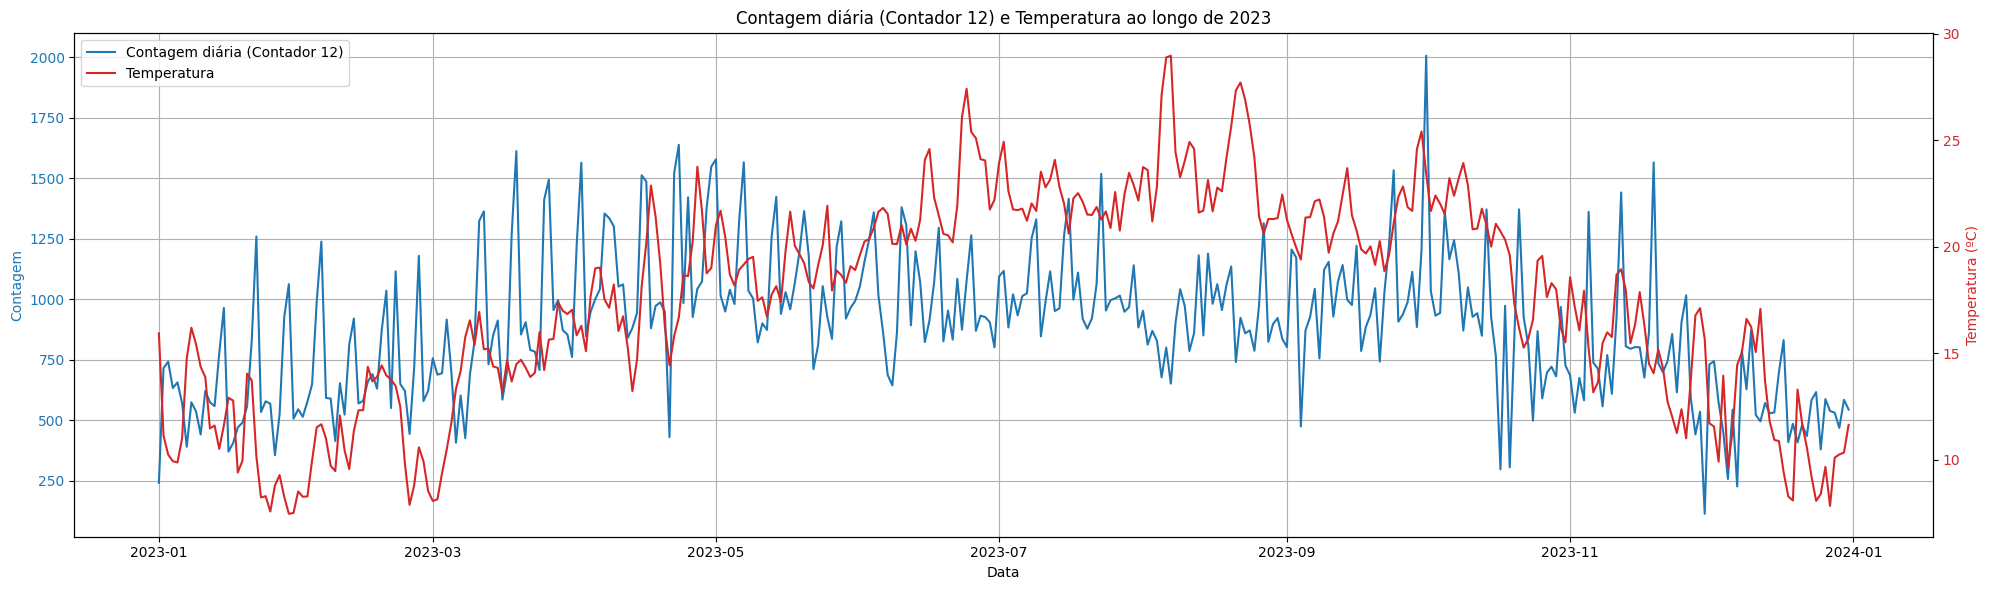

In [8]:
df_cont_2023 = df_corrigido_final[df_corrigido_final['datetime'].dt.year == 2023].copy()
df_meteo_2023 = df[df['datetime'].dt.year == 2023].copy()

# Fazer merge dos dados diários por data
df_merged = pd.merge(df_cont_2023[['datetime', 'count_12']], df_meteo_2023, on='datetime', how='inner')

# Ordenar por data para garantir sequência
df_merged = df_merged.sort_values('datetime')

# Criar gráfico
fig, ax1 = plt.subplots(figsize=(20,6))

# Primeiro eixo y: contagens do contador 12
ax1.plot(df_merged['datetime'], df_merged['count_12'], color='tab:blue', label='Contagem diária (Contador 12)')
ax1.set_xlabel('Data')
ax1.set_ylabel('Contagem', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Segundo eixo y: temperatura
ax2 = ax1.twinx()
ax2.plot(df_merged['datetime'], df_merged['temp'], color='tab:red', label='Temperatura')
ax2.set_ylabel('Temperatura (ºC)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Contagem diária (Contador 12) e Temperatura ao longo de 2023')
ax1.grid(True)
plt.xticks(rotation=45)

# Legendas combinadas
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

# Agrupar os dados por semana

In [9]:
df_corrigido_final

,datetime,direction_2,count_2,direction_3,count_3,direction_4,count_4,direction_5,count_5,direction_6,...,count_32,direction_33,count_33,direction_34,count_34,direction_35,count_35,holiday,weekend,exog
0,2021-08-01,219,327,155,323,138,424,238,341,539,...,500,401,769,354,691,526,1149,0,1,1
1,2021-08-02,144,252,194,381,117,372,249,364,735,...,486,355,590,436,777,523,1163,0,0,0
2,2021-08-03,151,257,187,397,137,411,321,431,732,...,568,441,699,376,724,584,1194,0,0,0
3,2021-08-04,141,266,157,337,158,423,306,404,706,...,563,379,626,430,799,616,1236,0,0,0
4,2021-08-05,159,259,182,333,121,370,257,370,740,...,584,367,602,424,846,636,1245,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2024-02-25,298,583,45,146,113,188,123,339,192,...,239,187,583,273,776,198,548,0,1,1
939,2024-02-26,226,494,290,606,193,316,281,732,357,...,206,155,374,381,1214,221,608,0,0,0
940,2024-02-27,235,539,347,743,240,377,428,1053,433,...,285,344,770,468,1368,271,780,0,0,0
941,2024-02-28,249,573,254,572,261,437,379,972,456,...,317,352,829,460,1399,267,744,0,0,0


In [10]:
# Garante que 'datetime' está em datetime64
df_corrigido_final['datetime'] = pd.to_datetime(df_corrigido_final['datetime'], errors='coerce')

# Define o índice de forma persistente (atenção: isto sobrescreve o df original)
df_corrigido_final.set_index('datetime', inplace=True)

# Agora sim: faz o resample
soma = df_corrigido_final.resample('W-MON').sum().reset_index()
media = df_corrigido_final.resample('W-MON').mean().reset_index()
std = df_corrigido_final.resample('W-MON').std().reset_index()


# Agrupar dados meteo por semana

In [11]:
df

,datetime,temp,precip
0,2021-08-01,20.850000,0.0
1,2021-08-02,21.420833,0.0
2,2021-08-03,21.858333,0.0
3,2021-08-04,22.741667,0.0
4,2021-08-05,22.620833,0.0
...,...,...,...
1244,2024-12-27,10.662500,0.0
1245,2024-12-28,10.608333,0.0
1246,2024-12-29,9.504167,0.0
1247,2024-12-30,8.575000,0.0


In [14]:
df = df.set_index('datetime')

In [16]:
df_meteo_semanal = df.resample('W-MON').mean().reset_index()
df_meteo_semanal.rename(columns={'datetime': 'semana_data'}, inplace=True)
#df_meteo_semanal.columns = ['semana_data', 'temp', 'precip']

# Merged do dados 

In [18]:
soma.rename(columns={'datetime': 'semana_data'}, inplace=True)
media.rename(columns={'datetime': 'semana_data'}, inplace=True)
std.rename(columns={'datetime': 'semana_data'}, inplace=True)

In [19]:
df_merged_soma = pd.merge(soma, df_meteo_semanal, on='semana_data', how='left')
df_merge_media = pd.merge(media, df_meteo_semanal, on='semana_data', how='left')
df_merge_std = pd.merge(std, df_meteo_semanal, on='semana_data', how='left')


In [20]:
df_merged_soma

,semana_data,direction_2,count_2,direction_3,count_3,direction_4,count_4,direction_5,count_5,direction_6,...,count_33,direction_34,count_34,direction_35,count_35,holiday,weekend,exog,temp,precip
0,2021-08-02,363,579,349,704,255,796,487,705,1274,...,1359,790,1468,1049,2312,0,1,1,21.135417,0.000000
1,2021-08-09,1098,1851,1104,2246,933,2618,1830,2530,4665,...,4751,2900,5569,4293,8944,0,2,2,21.719048,0.000000
2,2021-08-16,1071,1870,1033,2138,805,2348,1550,2209,4189,...,4975,3203,5831,4840,9537,1,2,2,24.116071,0.000000
3,2021-08-23,996,1792,1184,2271,839,2418,1640,2349,4340,...,4825,3136,5706,5191,9915,0,2,2,22.513095,0.000000
4,2021-08-30,1064,1886,1306,2512,869,2552,1883,2656,5178,...,4734,3425,6633,6428,9261,0,2,2,21.120238,0.011185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2024-02-05,1823,4322,1556,3654,1830,2827,2073,5174,3054,...,5493,2811,8771,1850,5351,0,2,2,13.158333,0.000000
132,2024-02-12,1491,3346,1642,3870,1151,1820,1596,4022,2353,...,3354,2460,6798,1432,3846,0,2,2,14.608929,0.160173
133,2024-02-19,1795,4116,916,2261,1526,2360,1833,4558,2525,...,5912,3115,8788,1935,5376,1,2,3,15.478571,0.015347
134,2024-02-26,1604,3593,1996,4422,1399,2248,1803,4769,2605,...,4618,2823,8171,1760,4938,0,2,2,13.739286,0.129697


### Gráficos

In [115]:
def plot_contador_meteo_merge(df_merged, contador_col, meteo_col='temp'):
    locale.setlocale(locale.LC_TIME, 'pt_PT.UTF-8')
    df_merged['semana_data'] = pd.to_datetime(df_merged['semana_data'])
    df_merged = df_merged.sort_values('semana_data')
    df_merged['semana_ano'] = df_merged['semana_data'].dt.isocalendar().week
    # Gráfico 1: Duas escalas
    fig, ax1 = plt.subplots(figsize=(18,6))
    ax1.grid(False)
    
    ax1.set_xlabel('Semana')
    ax1.set_ylabel('Contagem', color='tab:orange')
    ax1.plot(df_merged['semana_data'], df_merged[contador_col], color='tab:orange', label=contador_col)
    ax1.tick_params(axis='y', labelcolor='tab:orange')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Temperatura (°C)', color='tab:grey')
    ax2.plot(df_merged['semana_data'], df_merged[meteo_col], color='tab:grey', alpha=0.8, label=meteo_col)
    ax2.tick_params(axis='y', labelcolor='tab:grey')
    
    datas = df_merged['semana_data']
    min_data = datas.min()
    max_data = datas.max()
    inicio_mes = pd.date_range(start=min_data, end=max_data, freq='MS')

    for i, start in enumerate(inicio_mes):
        end = start + pd.offsets.MonthEnd(1)
        cor = (0.5, 0.7, 0.9, 0.1 + 0.05 * (i % 2))  # tons azul pastel alternados
        ax1.axvspan(start, end, color=cor)
        ax1.axvline(start, color='lightgrey', linestyle='--', linewidth=0.5)

        # Nome do mês
        mid = start + (end - start) / 2
        nome_mes = f"{start.strftime('%b').capitalize()}\n{start.year}"
        ax1.text(mid, ax1.get_ylim()[1]*0.98, nome_mes,
                 ha='center', va='top', fontsize=8, color='gray', alpha=0.8)

    semanas_para_ticks = df_merged[df_merged['semana_ano'] % 4 == 0]
    ticks_locs = mdates.date2num(semanas_para_ticks['semana_data'])
    ticks_labels = [str(w) for w in semanas_para_ticks['semana_ano']]
    
    ax1.set_xticks(ticks_locs)
    ax1.set_xticklabels(ticks_labels, rotation=45)
    ax1.tick_params(axis='x', which='major', length=2, width=1)

    plt.title(f'Contagem Semanal de Bicicletas e Temperatura - ({contador_col})')
    fig.tight_layout()
    plt.show()
    
    # # Gráfico 2: Normalizado
    # df_norm = df_merged.copy()
    # df_norm[contador_col] = minmax_scale(df_norm[contador_col])
    # df_norm[meteo_col] = minmax_scale(df_norm[meteo_col])
    
    # plt.figure(figsize=(14,6))
    # plt.plot(df_norm['semana_data'], df_norm[contador_col], label=f'{contador_col} (normalizado)', color='tab:blue')
    # plt.plot(df_norm['semana_data'], df_norm[meteo_col], label=f'{meteo_col} (normalizado)', color='tab:grey')
    # plt.xlabel('Semana')
    # plt.ylabel('Valor normalizado')
    # plt.title(f'Comparação normalizada: {contador_col} e {meteo_col}')
    # plt.grid(True)
    # plt.legend()
    # plt.tight_layout()
    # plt.show()


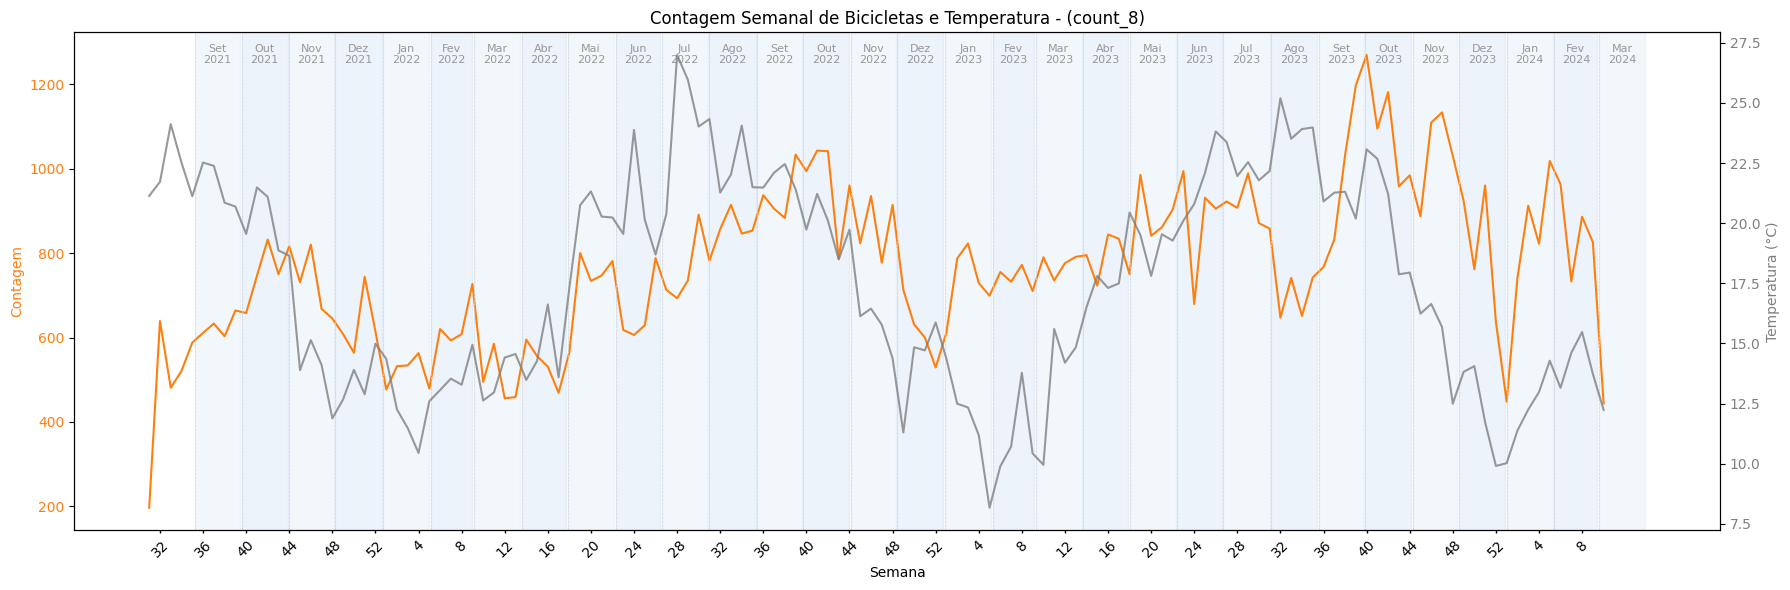

In [116]:
plot_contador_meteo_merge(df_merged_soma, 'count_8', 'temp')


In [23]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df_merged_soma['temp'], df_merged_soma['count_8'])

print(f"Coeficiente de correlação de Pearson: {corr_coef:.4f}")
print(f"P-valor: {p_value:.4e}")

Coeficiente de correlação de Pearson: 0.2657
P-valor: 1.7694e-03


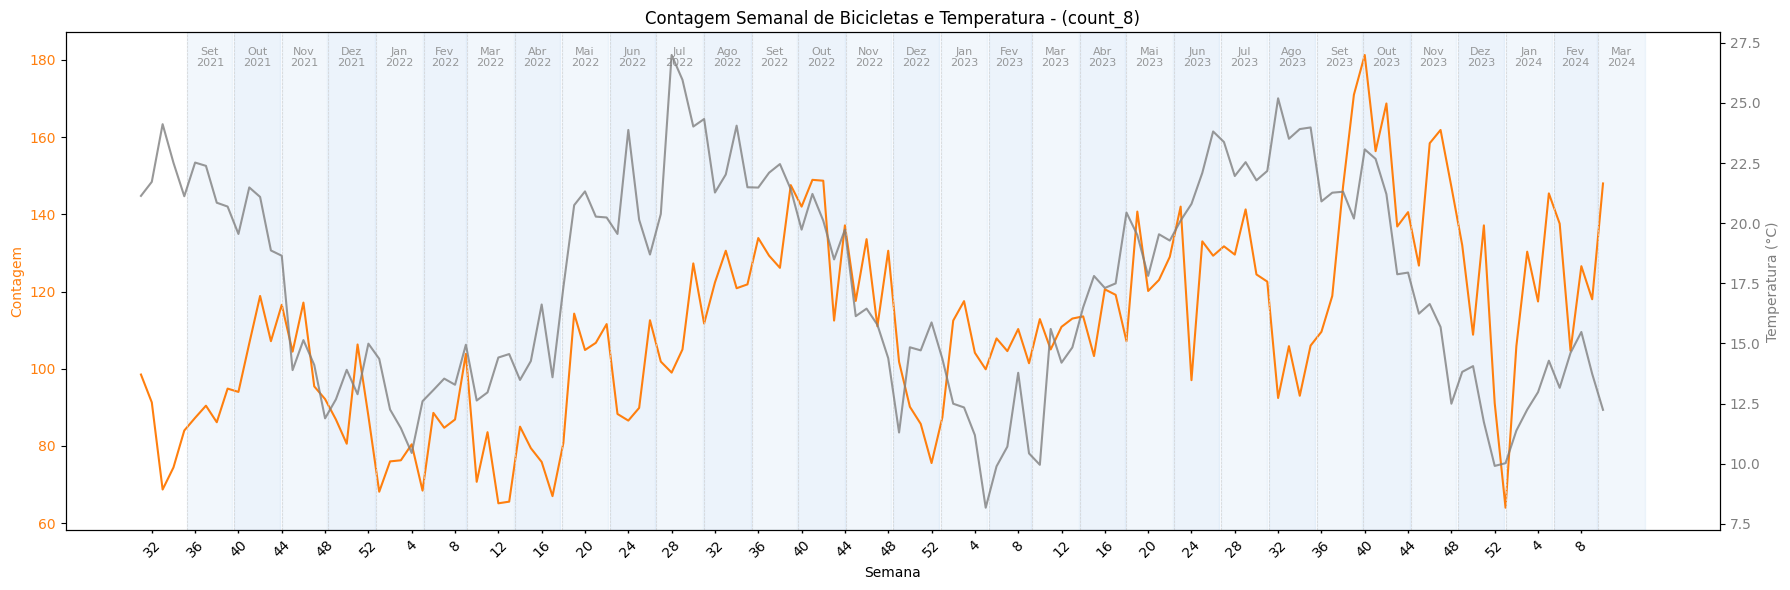

In [109]:
plot_contador_meteo_merge(df_merge_media, 'count_8', 'temp')

In [98]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df_merge_media['temp'], df_merge_media['count_8'])

print(f"Coeficiente de correlação de Pearson: {corr_coef:.4f}")
print(f"P-valor: {p_value:.4e}")

Coeficiente de correlação de Pearson: 0.2643
P-valor: 1.8732e-03


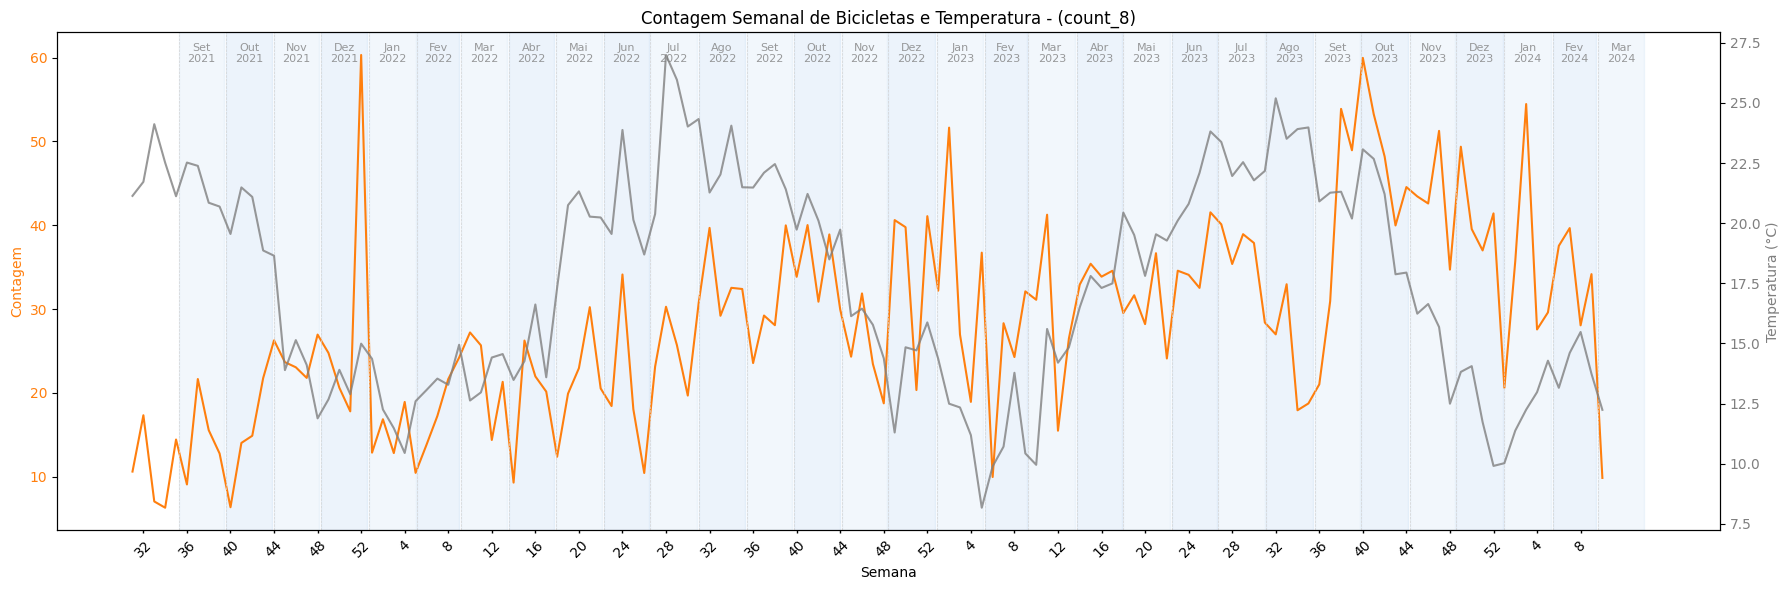

In [110]:
plot_contador_meteo_merge(df_merge_std, 'count_8', 'temp')

In [99]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df_merge_std['temp'], df_merge_std['count_8'])

print(f"Coeficiente de correlação de Pearson: {corr_coef:.4f}")
print(f"P-valor: {p_value:.4e}")

Coeficiente de correlação de Pearson: 0.0323
P-valor: 7.0871e-01


### Contador 12

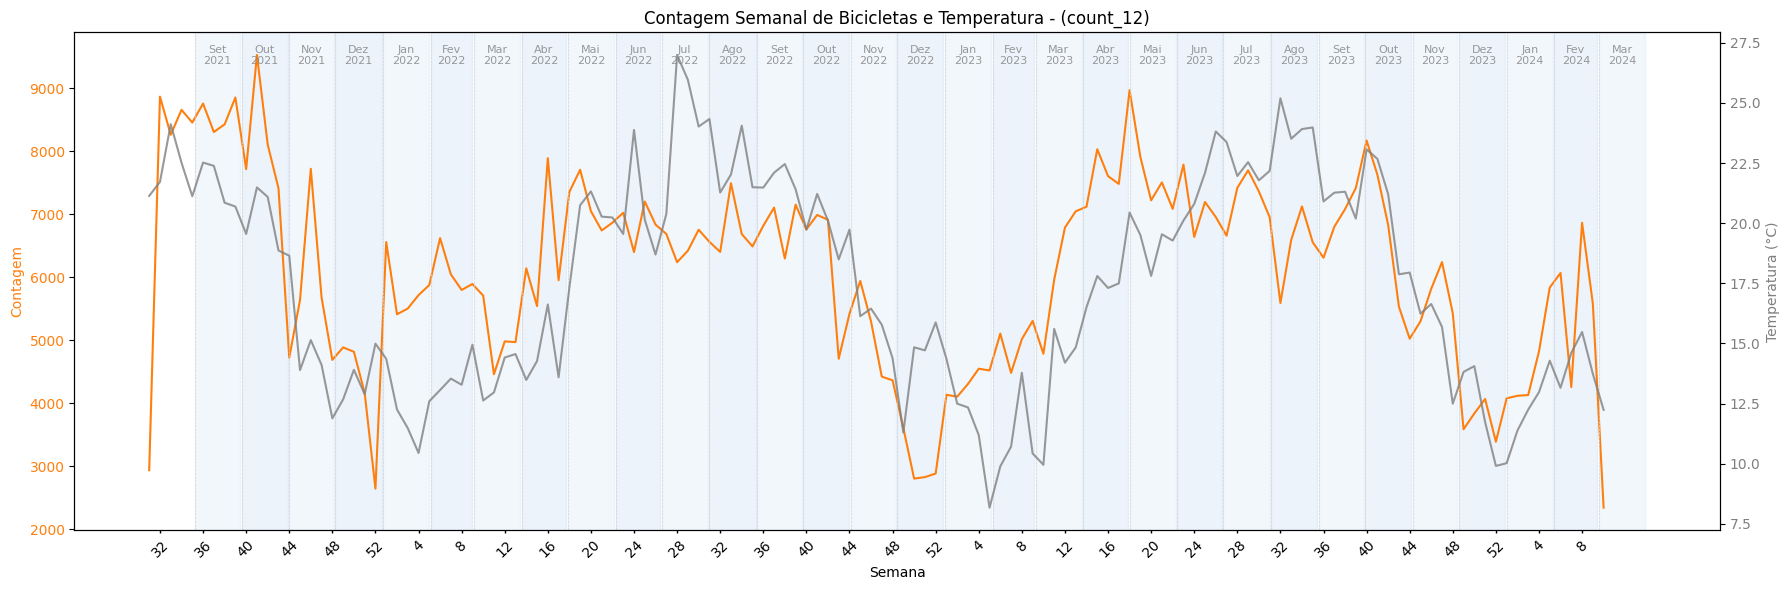

In [111]:
plot_contador_meteo_merge(df_merged_soma, 'count_12', 'temp')

In [29]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df_merged_soma['temp'], df_merged_soma['count_12'])

print(f"Coeficiente de correlação de Pearson: {corr_coef:.4f}")
print(f"P-valor: {p_value:.4e}")

Coeficiente de correlação de Pearson: 0.6447
P-valor: 2.4726e-17


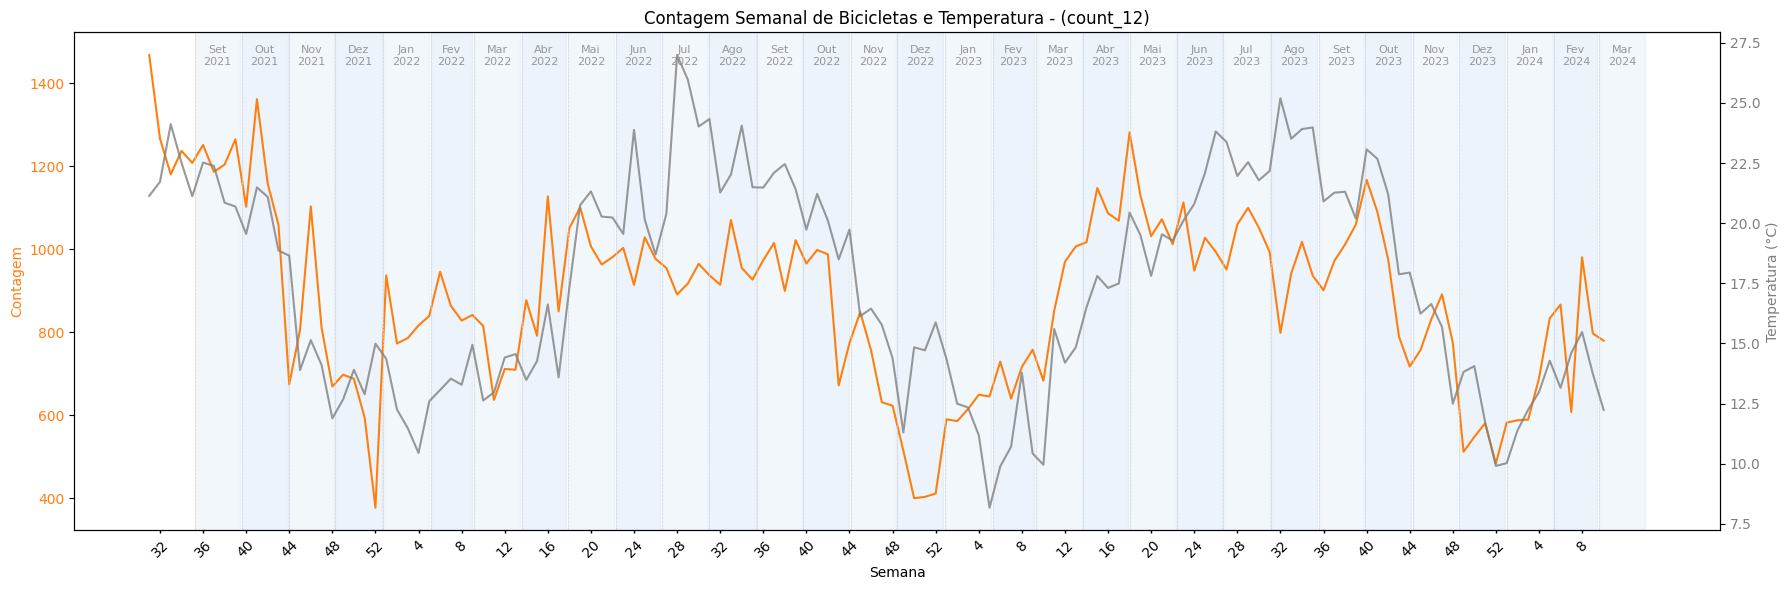

In [112]:
plot_contador_meteo_merge(df_merge_media, 'count_12', 'temp')

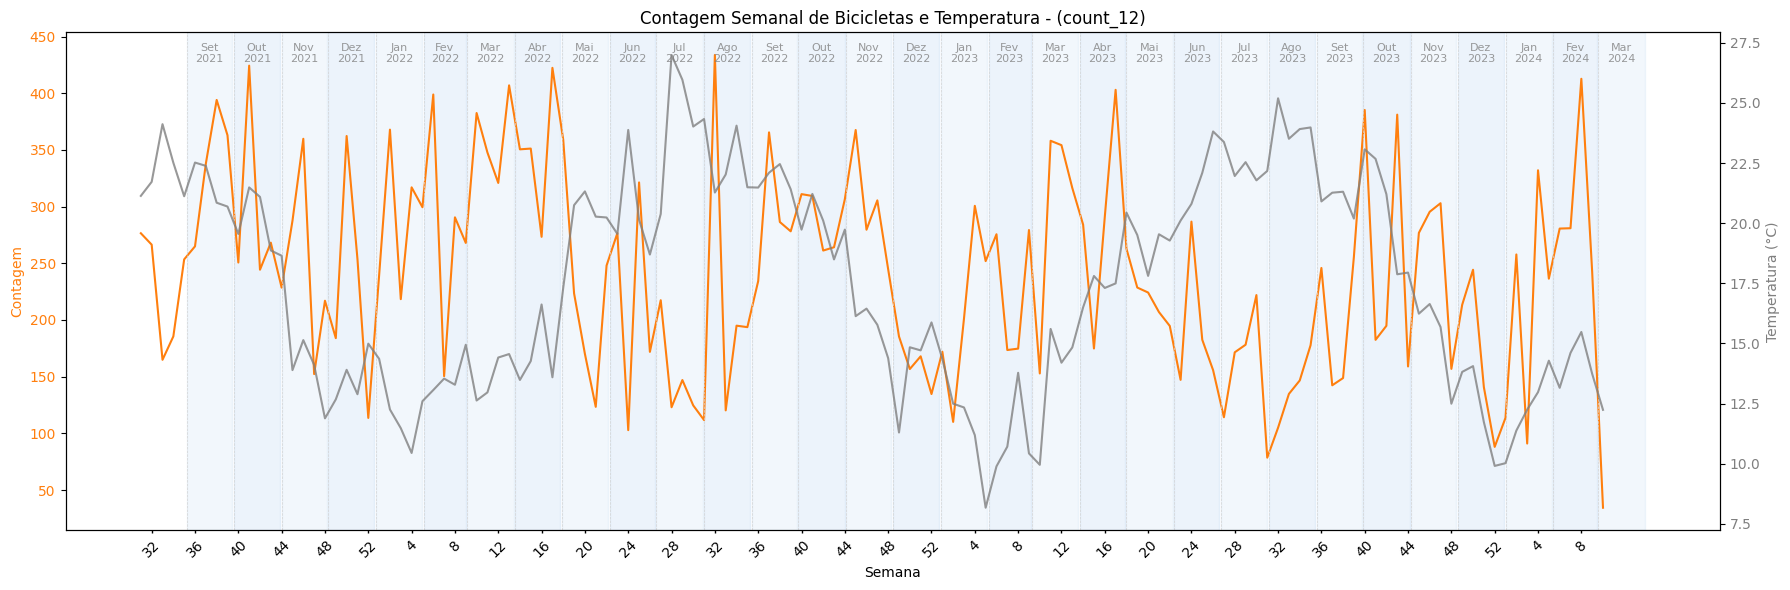

In [113]:
plot_contador_meteo_merge(df_merge_std, 'count_12', 'temp')